In [0]:
from collections import defaultdict
import itertools
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys, math

In [2]:
# load data from Google Drive
from google.colab import drive
drive.mount('/content/drive')
# cd into dataset dir
%cd /content/drive/My Drive/Colab Notebooks/_datasets/DA/
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/_datasets/DA
distmat


In [3]:
A = np.load('distmat', allow_pickle=True)

items = [0,5,7,3,8]
items = [0,207,397,396,391,390,389,388,387,384,383,408,410,413,415,420,424]
#print(items[1:])

A = A[items, :][:, items]
print(A.shape)
#A

(17, 17)


In [4]:
#mapping = dict({0:0, 1:5, 2:7, 3:3, 4:8})
_keys = range(A.shape[0])

mapping = {_keys[i]: items[i] for i in range(len(items))} 
mapping

{0: 0,
 1: 207,
 2: 397,
 3: 396,
 4: 391,
 5: 390,
 6: 389,
 7: 388,
 8: 387,
 9: 384,
 10: 383,
 11: 408,
 12: 410,
 13: 413,
 14: 415,
 15: 420,
 16: 424}

### Brute Force

* 4 items to collect: 5,7,3,8
* possible orders of collection: 24 (4!)
* Start and Finsish of tour:  vertex 0

In [5]:
print(math.factorial(A.shape[0]))

355687428096000


In [0]:
def find_best(paths, mapped_paths):
  min_dist = 1000000000
  min_dist_paths = {}
  for path, mapped_path in zip(paths, mapped_paths):
    dist = 0
    dist_ls = []
    for i in range(len(path)):
      if i == 0:
        dist += A[0, path[i]]
        dist_ls.append(A[0, path[i]])
      try:
        dist += A[path[i], path[i+1]]
        dist_ls.append(A[path[i], path[i+1]])
      except:
        dist += A[path[i], 0]
        dist_ls.append(A[path[i], 0])
        
    #print(mapped_path, dist, dist_ls)
    
    if dist < min_dist:
      min_dist = dist
    min_dist_paths[tuple(mapped_path)] = dist
  return min_dist_paths, min_dist

In [0]:
# paths = list(itertools.permutations(range(1,A.shape[0])))
# mapped_paths = [[mapping[item] for item in path] for path in paths]
# print(type(paths))
# print(type(mapped_paths))



### Approximation Algorithm

```
MST <- minimum spanning tree of G
D <- MST with each edges doubled
find an eulerian cycle C in D
return a cycle that visits vertices in the order of their appearance in C
```

In [7]:
G = nx.convert_matrix.from_numpy_matrix(A)
print(len(G.nodes()))
print(len(G.edges()))
print(nx.is_weighted(G))
print(G.get_edge_data(0,0))
print(G.get_edge_data(0,1))
print(G.get_edge_data(1,5))
nx.is_connected(G)

17
136
True
None
{'weight': 1639}
{'weight': 4110}


True

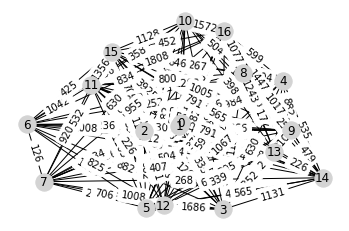

In [8]:
plt.figure() #figsize=(15,10)
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw(G, pos, with_labels = True, node_color='lightgrey') #, node_size=5
plt.show()

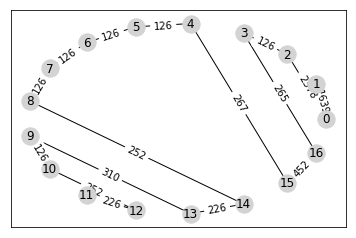

In [9]:
# MST <- minimum spanning tree of G

MST = nx.minimum_spanning_tree(G, weight='weight')
# print(list(MST))

plt.figure() #figsize=(15,10)
pos = nx.circular_layout(G) 
labels = nx.get_edge_attributes(MST, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx(MST, pos, with_labels=True, node_color='lightgrey') #figsize=(15,10)
plt.show()

[(0, 1), (0, 2), (1, 0), (2, 3), (2, 0), (3, 16), (3, 2), (16, 3), (16, 15), (4, 5), (4, 15), (5, 6), (5, 4), (15, 16), (15, 4), (6, 7), (6, 5), (7, 8), (7, 6), (8, 14), (8, 7), (14, 8), (14, 13), (9, 10), (9, 13), (10, 12), (10, 9), (13, 14), (13, 9), (12, 10), (12, 11), (11, 12)]


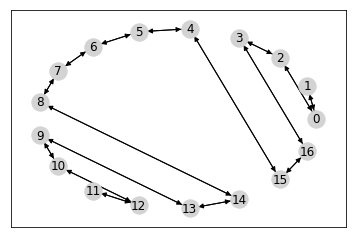

In [10]:
# D <- MST with each edges doubled

mst_edges = MST.edges()
D = nx.MultiDiGraph()
D.add_edges_from([(e[0], e[1]) for e in mst_edges])
D.add_edges_from([(e[1], e[0]) for e in mst_edges])
print(D.edges())

plt.figure() # figsize=(15,10)
pos = nx.circular_layout(G) 
nx.draw_networkx(D, pos, node_color='lightgrey')
plt.show()

optimal path approximation.: [0, 397, 396, 424, 420, 391, 390, 389, 388, 387, 415, 413, 384, 383, 410, 408, 207]


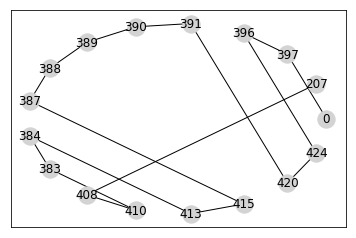

In [11]:
# find an eulerian cycle C in D

C = nx.eulerian_circuit(D)
C_edges = list(C)
# print(C_edges)

# return a cycle that visits vertices in the order of their appearance in C
visited = defaultdict(int)
[visited[i[0]] for i in C_edges]
# print(visited)

path = []
for edge in C_edges:
  u = edge[0]
  v = edge[1]
  if visited[u]==0:
    path.append(u)
    visited[u]=1
  if visited[v]==0:
    path.append(v)
    visited[v]=1
len(path)
res = list(map(mapping.get, path))
print(f'optimal path approximation.: {res}')


TSP = nx.Graph()
TSP.add_path(path)
nx.relabel_nodes(TSP, mapping, copy=False)

plt.figure()
pos = nx.circular_layout(TSP) 
labels = nx.get_edge_attributes(TSP,'weight')
nx.draw_networkx_edge_labels(TSP, pos,edge_labels=labels)
nx.draw_networkx(TSP, pos, with_labels=True, node_color='lightgrey') #, node_size=5
plt.show()

In [29]:
# lookup distance
# recall input items order is [0,207,397,396,391,390,389,388,387,384,383,408,410,413,415,420,424]

# pprint(mapping)
mapped_paths = [[0, 397, 396, 424, 420, 391, 390, 389, 388, 387, 415, 413, 384, 383, 410, 408, 207]]
decode_dictionary = {v:k for k,v in mapping.items()}
paths = [list(map(decode_dictionary.__getitem__, mapped_paths[0]))]
# print(paths)
# print(solution)
# print(solution_idx)

res, min_dist = find_best(paths, mapped_paths)
print(f'dist for path {res}')

# # DA
mapped_paths = [[0, 408, 383, 384, 410, 387, 413, 388, 389, 415, 390, 391, 420, 396, 397, 207, 424]]
decode_dictionary = {v:k for k,v in mapping.items()}
paths = [list(map(decode_dictionary.__getitem__, mapped_paths[0]))]

# # print(solution)
# # print(solution_idx)

res, min_dist = find_best(paths, mapped_paths)
print(f'dist for DA path {res}')


 

dist for path {(0, 397, 396, 424, 420, 391, 390, 389, 388, 387, 415, 413, 384, 383, 410, 408, 207): 11887}
dist for DA path {(0, 408, 383, 384, 410, 387, 413, 388, 389, 415, 390, 391, 420, 396, 397, 207, 424): 17884}
